<font style="font-size:96px; font-weight:bolder; color:#0040a0"><img src="http://montage.ipac.caltech.edu/docs/M51_logo.png" alt="M" style="float: left; padding: 25px 30px 25px 0px;" /></font>

<i><b>Montage</b> Montage is an astronomical image toolkit with components for reprojection, background matching, coaddition and visualization of FITS files. It can be used as a set of command-line tools (Linux, OS X and Windows), C library calls (Linux and OS X) and as Python binary extension modules.

The Montage source is written in ANSI-C and code can be downloaded from GitHub ( https://github.com/Caltech-IPAC/Montage ). The Python package can be installed from PyPI ("</i>pip install MontagePy<i>"). The package has no external dependencies. See http://montage.ipac.caltech.edu/ for details on the design and applications of Montage.


# MontagePy.main modules: mFixNaN

If one FITS file is faulty, it can ruin a mosaic.  Cosmetic fixes like interpolating holes are outside the scope of Montage but there are certain common defects can can be mended relatively easily.

Blank pixels will be automatically excluded from all calculations and such regions often get filled in by other images in the mosaic.  In floating-point FITS files these are supposed to be represented by NaN (not-a-number) binary values but frequently this is replaced by some specific value (often zero).  Under these circumstances that value looks authentic to Montage (and other programs) and gets averaged into the processing.  Similarly, "undefined" regions, such as around the corners of an Aitoff all-sky projection, have the same problem.  They can get reprojected into "real" space.

mFixNaN provide mechanisms for converting specific data values or ranges into NaN.  Occasionally, one may want to reverse the process and convert NaN values to some specific real value (<i>e.g.</i>, so as to have the right color shown when the image is converted to a PNG). 

In [1]:
from MontagePy.main import mFixNaN, mViewer

help(mFixNaN)

Help on built-in function mFixNaN in module MontagePy.main:

mFixNaN(...)
    mFixNaN performs various corrections associated with NaNs; either converting bad ones to another value or setting bad values to NaNs.
    
    Parameters
    ----------
    input_file : str
        FITS file to fix.
    output_file : str
        Fixed FITS file.
    haveVal : bool
        This flag indicates that NaNs should be converted to a different value.
    NaNvalue : float
        Value to convert NaNs to.  Used when the NaNs in an image are incorrectly used.
    nMinMax : int
        Number of min/max (or limit) ranges/values.
    minblank : np.ndarray
        Min values for min/max ranges or standalone lower limits.
    ismin : np.ndarray
        Booleans indicating whether min values are min/max (0) or standalone lower limit.
    maxblank : np.ndarray
        Max values for min/max ranges or standalone upper limits.
    ismax : np.ndarray
        Booleans indicating whether each max value is part of

## mFixNaN Example:

mFixNaN scans the data values, converting the ones identified the user to (or from) NaNs.  They will then be treated properly by other software.  Here we will use an unrealistic case to make the processing more obvious; converting all the brightest pixels to NaN.

In [2]:
rtn = mFixNaN("M17/raw/2mass-atlas-990502s-j1430080.fits", 
              "work/M17/2mass-atlas-990502s-j1430080_fixnan.fits", 
              True, 190.,
              2, [50., 210.], [False, True], [51., 0.], [False, False])
print(rtn)

{'status': '0', 'rangeCount': 12059, 'nanCount': 20255, 'boundaryCount': 0}


Since our viewer shows all blank pixels as black, we can use to demonstrate the effect of the above call.  The original image is on the left; the output on the right.  Again, this is an artificial example.  The values we converted were perfectly good.

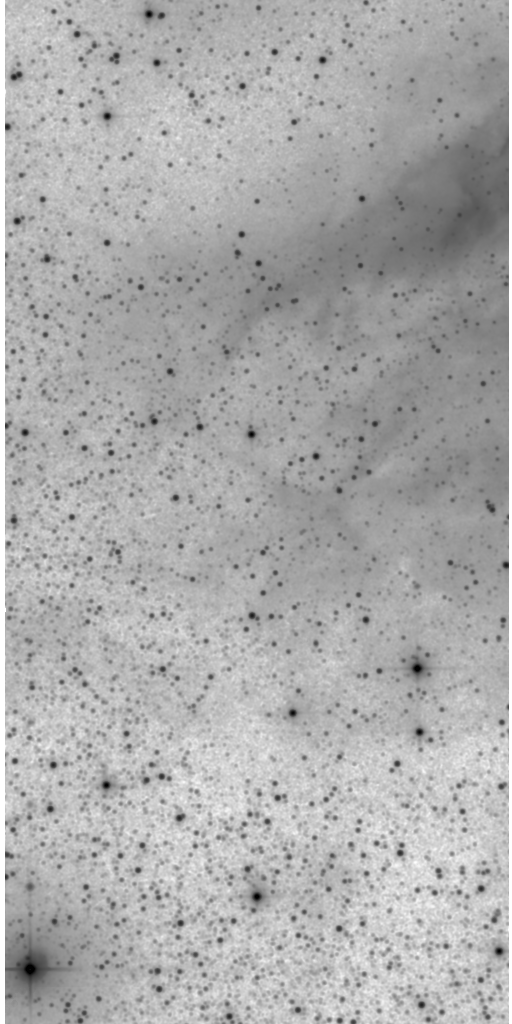

In [3]:
from IPython.display import display, HTML, Image

mViewer("-ct 1 -gray M17/raw/2mass-atlas-990502s-j1430080.fits \
         -2s max gaussian-log -out work/M17/2mass-atlas-990502s-j1430080.png", 
        "", mode=2)

Image(filename='work/M17/2mass-atlas-990502s-j1430080.png')

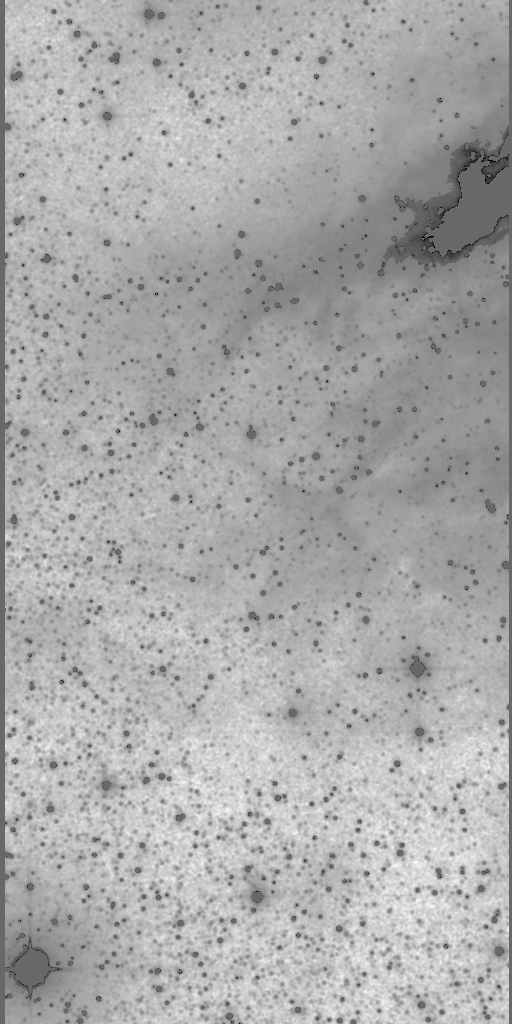

In [4]:
mViewer("-ct 1 -gray work/M17/2mass-atlas-990502s-j1430080_fixnan.fits \
         -2s max gaussian-log -out work/M17/2mass-atlas-990502s-j1430080_fixnan.png", 
              "", mode=2)

Image(filename='work/M17/2mass-atlas-990502s-j1430080_fixnan.png')

&nbsp;<p/>

## Error Handling

If mFixNaN encounters an error, the return structure will just have two elements: a status of 1 ("error") and a message string that tries to diagnose the reason for the error.

For instance, if the user specifies an image that doesn't exist: 


In [5]:
rtn = mFixNaN("M17/raw/unknown.fits", 
              "work/M17/2mass-atlas-990502s-j1430080_fixnan.fits", 
              True, 190.,
              2, [50., 210.], [False, True], [51., 0.], [False, False])
print(rtn)

{'status': '1', 'msg': b'File M17/raw/unknown.fits not found.'}


&nbsp;

## Classic Montage: mFixNaN as a Stand-Alone Program

### mFixNaN Unix/Windows Command-line Arguments

<p>mFixNaN can also be run as a command-line tool in Linux, OS X, and Windows:</p>

<p><tt>
<b>Usage:</b> mFixNaN [-b(oundary-check)][-d level][-v NaN-value] in.fits out.fits [minblank maxblank] (output file name '-' means no file; min/max ranges can be repeated and can be the words 'min' and 'max')
</tt></p>
<p>&nbsp;</p>
<p>If you are writing in C/C++, mFixNaN can be accessed as a library function:</p>


<pre>
/*-***********************************************************************/
/*                                                                       */
/*  mFixNaN                                                              */
/*                                                                       */
/*  Montage is a set of general reprojection / coordinate-transform /    */
/*  mosaicking programs.  Any number of input images can be merged into  */
/*  an output FITS file.  The attributes of the input are read from the  */
/*  input files; the attributes of the output are read a combination of  */
/*  the command line and a FITS header template file.                    */
/*                                                                       */
/*  This module, mFixNaN, converts NaNs found in the image to some       */
/*  other value (given by the user) or ranges of values to NaNs          */
/*                                                                       */
/*   char  *input_file     FITS file to fix                              */
/*   char  *output_file    Fixed FITS file                               */
/*                                                                       */
/*   int    haveVal        This flag indicates that NaNs should be       */
/*                         converted to a different value.               */
/*                                                                       */
/*   double NaNvalue       The value associated with the above flag.     */
/*                         This is for situations where the NaNs in the  */
/*                         image are incorrectly used.                   */
/*                                                                       */
/*   int    nMinMax        The next five arguments define a set of value */
/*                         ranges which will be converted to NaNs.  This */
/*                         one is the count of these ranges.             */
/*                                                                       */
/*   double *minblank      The 'ranges' can either have min/max values   */
/*                         or can be just an upper (max) value (i.e.     */
/*                         with a min of -Infinity) or a lower (min)     */
/*                         value (i.e. with a max of +Infinity).  This   */
/*                         array of values are the minumums.             */
/*                                                                       */
/*   int    *ismin         This array is a set of booleans indicating    */
/*                         whether each min value above is part of a     */
/*                         min/max range (0) or a standalone lower limit */
/*                         (in which case the corresponding max is       */
/*                         ignored).                                     */
/*                                                                       */
/*   double *maxblank      Max values for min/max ranges or standalone   */
/*                         upper limits.                                 */
/*                                                                       */
/*   int    *ismax         Booleans indicating whether each max value is */
/*                         part of a min/max range (0) or a standalone   */
/*                         upper limit (1).                              */
/*                                                                       */
/*   int    boundaries     Some projections (e.g. Aitoff) have regions   */
/*                         of the image that are non-physical but which  */
/*                         may have non-blank values (e.g. 0 instead of  */
/*                         NaN).  If this flag is on, check for that and */
/*                         convert those pixels to proper NaNs.          */
/*                                                                       */
/*   int    debug          Debugging output level                        */
/*                                                                       */
/*                                                                       */
/* The 'NaNvalue' and ranges can be used together: The ranges are used   */
/* to logically convert some values to NaN and then the NaNvalue is used */
/* to convert those and any other naturally occuring NaNs to the         */
/* the NaNvalue.  However, this is unlikely to be of much use in         */
/* practice.                                                             */
/*                                                                       */
/*************************************************************************/

struct mFixNaNReturn  *mFixNaN(char *input_file, char *output_file,
                               int haveVal, double NaNvalue, int nMinMax,
                               double *minblank, int *ismin,
                               double *maxblank, int *ismax,
                               int boundaries, int debug)
                               
</pre>
<p><b>Return Structure</b></p>
<pre>
struct mFixNaNReturn
{
   int    status;        // Return status (0: OK, 1:ERROR)
   char   msg [1024];    // Return message (for error return)
   char   json[4096];    // Return parameters as JSON string
   int    rangeCount;    // Number of pixels found in the range(s) specified
   int    nanCount;      // Number of NaN pixels found
   int    boundaryCount; // Number of pixels found in 'boundary' regions
};
</pre>